<img align="center" src="./images/occiput_logo3.png" width="400">

# UNIFORM CYLINDER acquired on Siemens Biograph mMR
Load listmode data of a uniform cylinder (cyclindrical container filled with FDG diluted in water) acquired on Siemens Biograph mMR and reconstruct using OSEM. Compare the reconstruction with the reconstruction obtained with the Siemens E7 Tools using the same parameters of the OSEM algorithm. 

In [14]:
import occiput
from occiput.Reconstruction.PET.PET_scanners import Biograph_mMR

from occiput.DataSources.FileSources import import_interfile_volume

In [15]:
pet = occiput.Reconstruction.PET.PET_Static_Scan()

In [16]:
pet.set_scanner(Biograph_mMR)

In [17]:
pet.use_compression(True)

### LOAD MEASUREMENT DATA 4 HOURS

In [18]:
datapath = '../../data/PET_data/scans/2014_12_03_cylinder/'

In [19]:
listmode = 0
if (listmode == 1):
    time_range_ms = [0,4*60*60*1000]
    pet.import_listmode('listmode/PET_ACQ_342_20141212155111-0.l.hdr',time_range_ms=time_range_ms)
    pet.export_prompts(datapath+'occiput/prompts_4hours.h5')
    pet.export_randoms(datapath+'occiput/randoms_4hours.h5')
else:
    pet.import_prompts(datapath+'occiput/prompts_4hours.h5')
    pet.import_randoms(datapath+'occiput/randoms_4hours.h5')

In [20]:
pet.import_sensitivity(datapath+'norm/norm3d_00.h33')

In [21]:
pet.import_randoms(datapath+'output/smoothed_rand_00.h33')

In [22]:
pet.import_scatter(datapath+'scatter/scatter_3D.s.hdr')

In [23]:
pet.import_attenuation(datapath+'mumaps/cylinder_umap.v.hdr',
                       filename_hardware=datapath+'mumaps/hw_umap.v.hdr')

In [24]:
attenuation_projection = pet.project_attenuation(pet.attenuation)

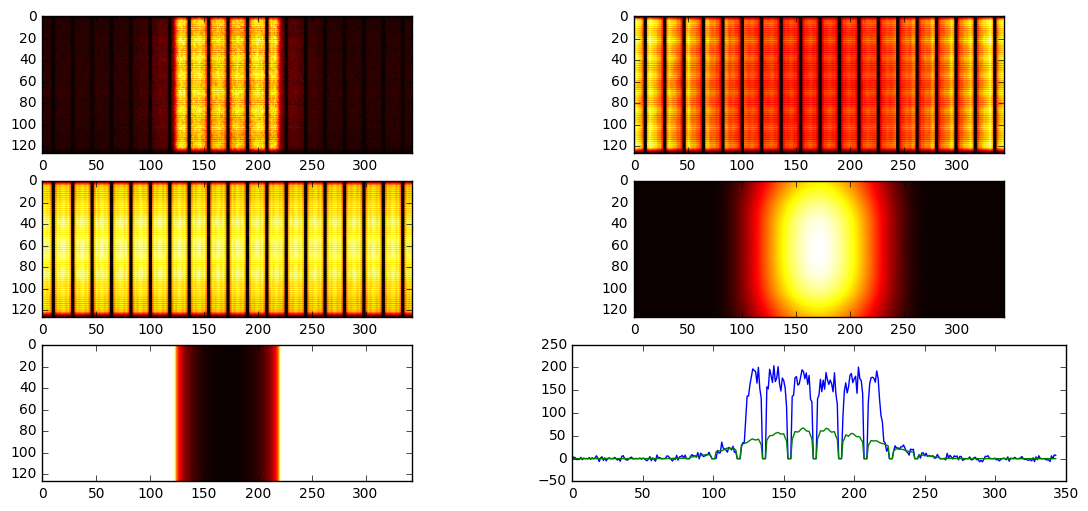

In [26]:
figure(figsize=[14,6])
subplot(3,2,1); imshow(pet.prompts.to_nd_array()[0,5,:,:].transpose(), cmap='hot')
subplot(3,2,2); imshow(pet.sensitivity.to_nd_array()[0,5,:,:].transpose(), cmap='hot')
subplot(3,2,3); imshow(pet.randoms.to_nd_array()[0,5,:,:].transpose(), cmap='hot')
subplot(3,2,4); imshow(pet.scatter.to_nd_array()[0,5,:,:].transpose(), cmap='hot')
subplot(3,2,5); imshow(attenuation_projection.to_nd_array()[0,5,:,:].transpose(), cmap='hot')
subplot(3,2,6); pet.quick_inspect()

### RECONSTRUCT

In [33]:
iterations = 63
subset_mode = "ordered_axial"
subset_size = 12

#iterations = 6
#subset_mode = "random"
#subset_size = 64

In [34]:
activity_recon = pet.osem_reconstruction(iterations=iterations, subset_mode=subset_mode, subset_size=subset_size, attenuation_projection=attenuation_projection)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [35]:
activity_recon.save_to_file(datapath+'occiput/activity_recon.nii')

### Compare to Siemens E7 Tools

In [43]:
activity_Siemens = import_interfile_volume(datapath+'recon_yes_att/recon__000_000.v.hdr')

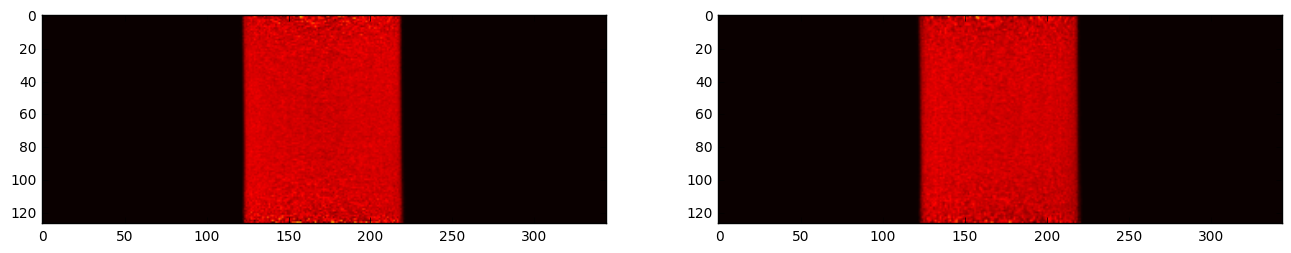

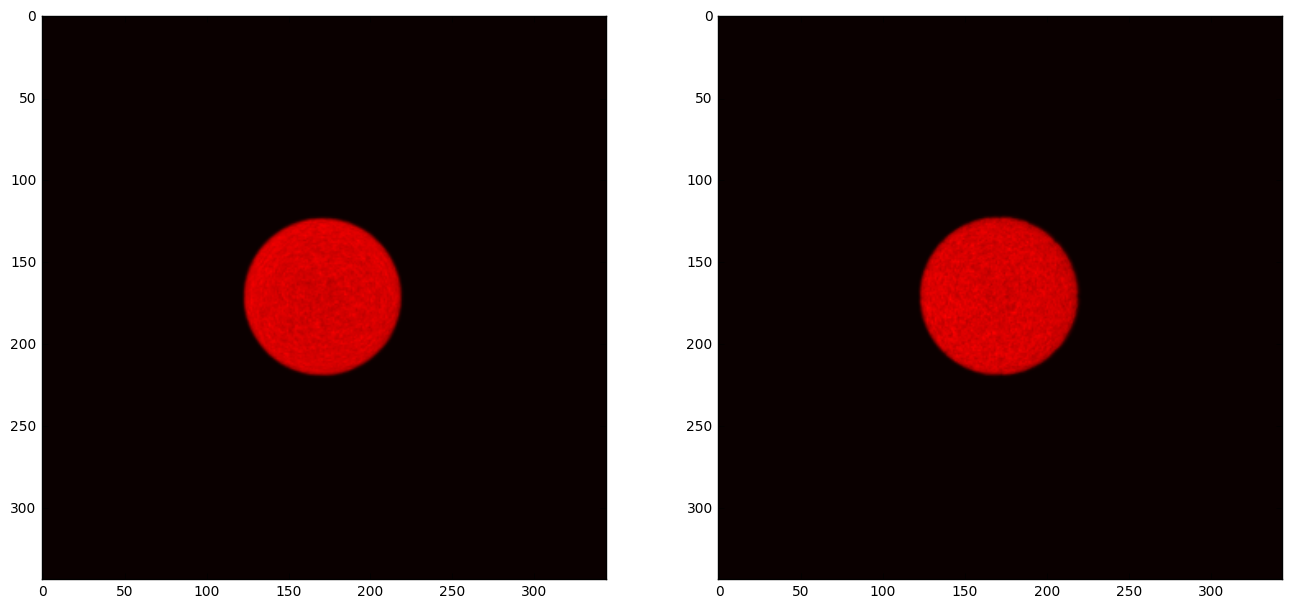

In [55]:
figure(figsize=[16,6])
subplot(2,2,1); imshow(activity_Siemens.data[:,pet.activity_shape[1]/2,:].transpose(), vmax = 5.0, cmap='hot')
subplot(2,2,2); imshow(activity_recon.data[:,pet.activity_shape[1]/2,:].transpose(), vmax = 5.0, cmap='hot')
figure(figsize=[16,16])
subplot(2,2,3); imshow(activity_Siemens.data[:,:,pet.activity_shape[2]/2].transpose(), vmax = 5.0, cmap='hot')
subplot(2,2,4); imshow(activity_recon.data[:,:,pet.activity_shape[2]/2].transpose(), vmax = 5.0, cmap='hot')